In [67]:
"""
@author: maximefontana
"""
# System
import sys

# Graph Data
import snap
import networkx as nx

# Scientific Computing 
import numpy as np
import scipy
import pandas as pd

# Math
import random as ran
from time import time

# Custom imports
%run 'Algorithms.ipynb'
%run 'ClusteringEvaluation.ipynb'
%run 'PlotFunctions.ipynb'
%run 'GroundTruthGen.ipynb'
%run 'SBM.ipynb'

# Specific models
from sklearn.cluster import SpectralClustering, KMeans
from sklearn import metrics

# Plotting
from matplotlib import pyplot as plt

Algo 1 [2 2 2 4 4 1 1 4 2 1 4 4 3 0 0 1 4 4 1 2 3 0 1 0 4 4 3 1 1 3 0 2 1 2 4 3 1
 1 4 0 3 1 4 1 4 2 2 0 0 2 4 1 3 3 0 0 3 3 1 3 1 4 4 4 2 0 0 1 3 0 2 4 4 3
 2 0 2 3 1 1 1 1 4 1 2 0 2 1 1 4 0 1 0 2 3 2 2 0 1 0]
Algo 2 [2 0 0 2 4 0 0 2 1 0 3 2 4 4 1 2 1 1 4 4 1 0 2 2 0 4 1 3 1 1 3 2 3 1 3 3 1
 4 1 3 1 0 1 1 4 0 2 1 0 0 1 2 3 3 2 4 3 1 2 2 4 2 3 3 4 3 2 2 4 3 4 2 0 2
 3 1 4 4 2 0 1 1 0 2 4 0 4 4 3 4 2 3 2 0 1 1 3 1 1 0]
Fair clusters
[{1, 2, 99, 5, 6, 72, 9, 41, 45, 79, 48, 49, 82, 21, 85, 24, 93}, {8, 14, 16, 17, 20, 26, 28, 29, 33, 36, 38, 40, 42, 43, 47, 50, 57, 75, 80, 81, 94, 95, 97, 98}, {0, 3, 7, 11, 15, 22, 23, 31, 46, 51, 54, 58, 59, 61, 66, 67, 71, 73, 78, 83, 90, 92}, {32, 65, 34, 35, 96, 69, 39, 88, 10, 74, 91, 52, 53, 56, 62, 27, 30, 63}, {4, 12, 13, 18, 19, 25, 37, 44, 55, 60, 64, 68, 70, 76, 77, 84, 86, 87, 89}]
ground truth
[{0, 1, 2, 3, 20, 21, 22, 23, 40, 41, 42, 43, 60, 61, 62, 63, 80, 81, 82, 83}, {4, 5, 6, 7, 24, 25, 26, 27, 44, 45, 46, 47, 64, 65, 66, 67, 84, 85, 86

In [2]:
#pip install networkx==2.5

Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Be careful! This cell will take several hours to run!

test1, USC_score, Fair_USC_score = get_averaged_tests_55(4, 0.2, 0.15, 0.1, 0.05)
test2, algo1run2, algo2run2 = get_averaged_tests_55(4, 0.4, 0.3, 0.2, 0.1)
test3, algo1run3, algo2run3 = get_averaged_tests_55(4, 0.3, 0.2, 0.15, 0.1)

<ipython-input-65-aeb319a6052a>:14: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=6)


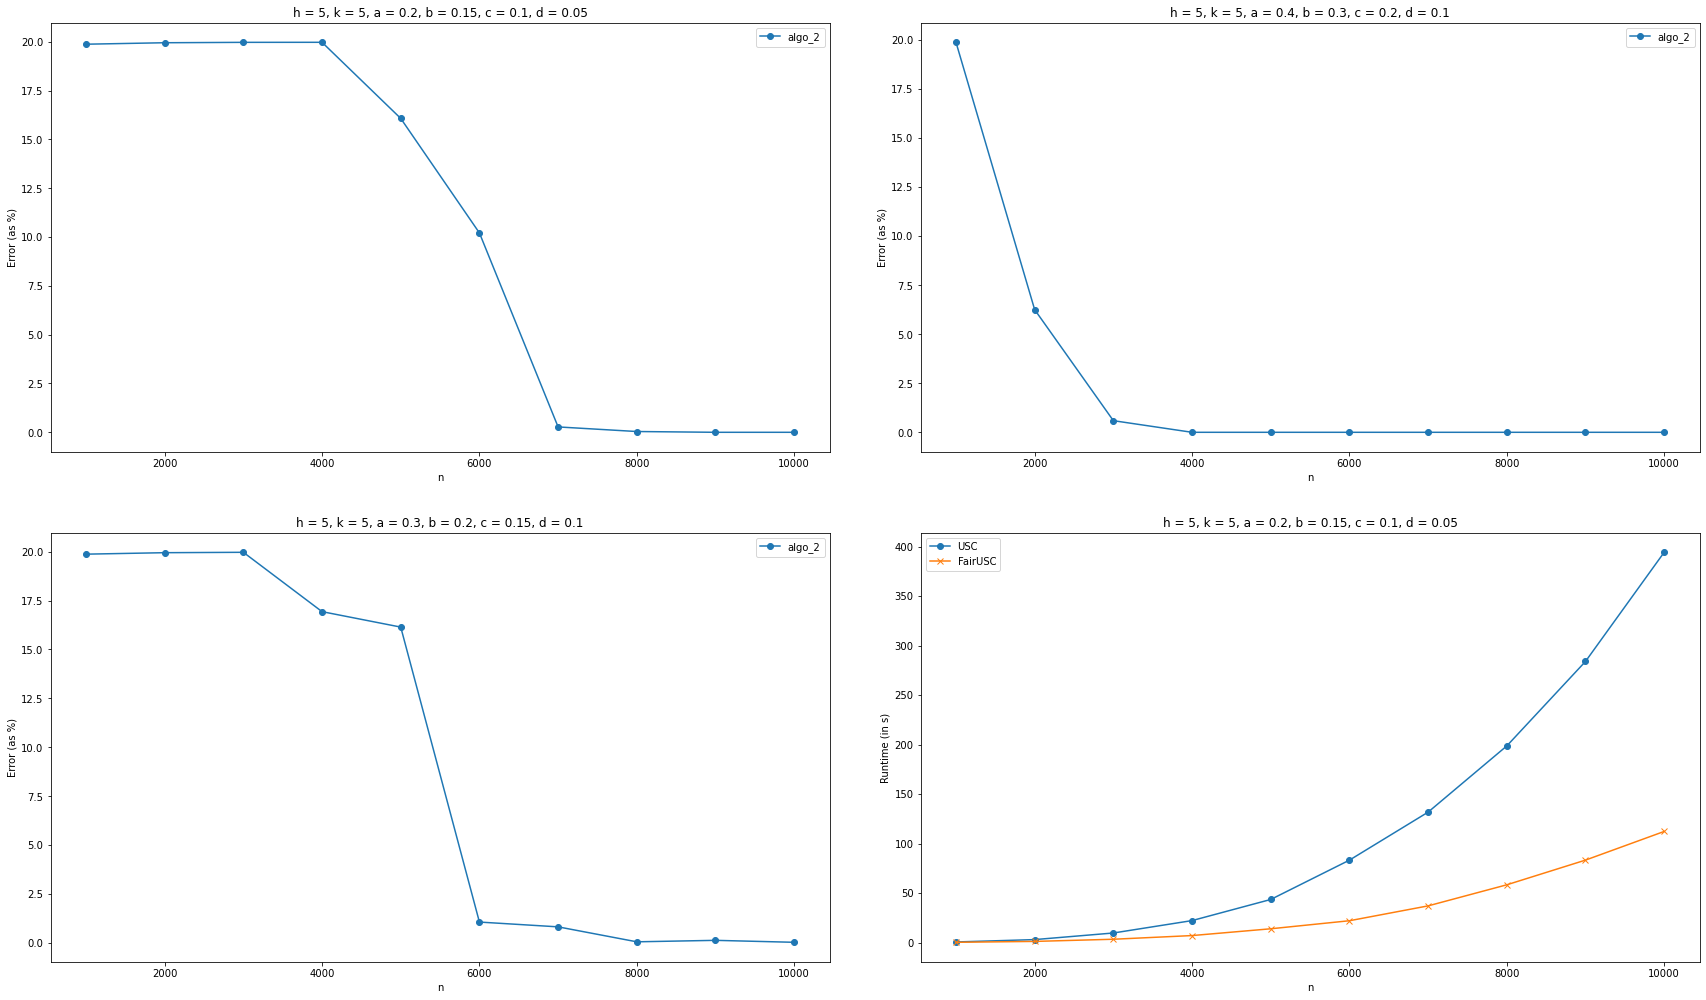

In [65]:
# This is hard-coded as variables got from hours-long algorithms were not 
# individually properly! However! The results were kept and are correct and were
# actually computed from my algorithms in the commands in the cell above!

test1 = [19.875, 19.95, 19.97, 19.9725, 16.075,  10.21, 0.275,  0.04, 0., 0.]
test2 = [19.875, 6.25, 0.5925,  0., 0., 0., 0., 0., 0., 0.]
test3 = [19.875, 19.95,  19.97,  16.935, 16.145,  1.06,   0.815,  0.05,   0.125,  0.025]
USC_score = [ 0.54617465,   2.93992597,   9.60373455,  22.13490546,  43.46908695,
  83.1985209,  131.71047473, 198.59189975, 283.93881142, 394.21269351]
Fair_USC_score = [  0.20511776,   1.10660887,   3.28844804,   7.00502759,  13.86039871,
  21.98830396,  37.00142068,  58.29770422,  83.24058729, 112.19232947]

fig, axs = plt.subplots(2, 2, figsize=(25,15), constrained_layout=True)
fig.tight_layout(pad=6)
x = np.arange(1000, 11000, 1000)

axs[0, 0].plot(x, test1, label="algo_2", marker='o')
axs[0, 0].set_title('h = 5, k = 5, a = 0.2, b = 0.15, c = 0.1, d = 0.05')

axs[0, 1].plot(x, test2, label="algo_2", marker='o')
axs[0, 1].set_title('h = 5, k = 5, a = 0.4, b = 0.3, c = 0.2, d = 0.1')

axs[1, 0].plot(x, test3, label="algo_2", marker='o')
axs[1, 0].set_title('h = 5, k = 5, a = 0.3, b = 0.2, c = 0.15, d = 0.1')

axs[1, 1].set_title('h = 5, k = 5, a = 0.2, b = 0.15, c = 0.1, d = 0.05')
axs[1, 1].plot(x, USC_score, label="USC", marker='o')
axs[1, 1].plot(x, Fair_USC_score, label="FairUSC", marker='x')

plt.setp(axs[:], xlabel='n')
plt.setp(axs[:], ylabel='Error (as %)')
plt.setp(axs[1,1], ylabel='Runtime (in s)')

axs[0,0].legend(loc=0)
axs[1, 1].legend(loc=0)
axs[0, 1].legend(loc=0)
axs[1, 0].legend(loc=0)